In [92]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
import matplotlib.pyplot as plt
#%matplotlib
import numpy as np

In [93]:
class Model(nn.Module):
    def __init__(self, in_features=6, h1=16, h2=8, h3=4, out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # passes input to layer 1
        self.fc2 = nn.Linear(h1, h2) # passes layer 1 to layer 2
        self.fc3 = nn.Linear(h2, h3) # passes layer 2 to layer 3
        self.out = nn.Linear(h3, out_features) # passes layer 3 to output
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

        return x

In [94]:
# Set manual seed for randomizing
torch.manual_seed(10)
# Instantiate model
model = Model()

In [95]:
# Specify what is relevant data
data = "dataset/parkinsons.data"
selected_features = ['status', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'RPDE', 'PPE']

# load dataset
df = pd.read_csv(data)
df = df[selected_features]


In [96]:
# set x and y parameters\\
x = df.drop(columns=['status']) # input variables
y = df['status'] # target variable - binary value to determine if subject has parkinsons or not

# Convert x and y to numpy arrays
x = x.values
y = y.values

In [97]:
# train test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Scale x values
x_train = scalar.fit_transform(x_train) # Fit on train, transform train
x_test = scalar.transform(x_test) # Transform test using train scaler

# Convert x values to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# For classification: y is usually left as integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [98]:
# Measure error
criterion = nn.CrossEntropyLoss()
# define optimiser and set learning rate
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

In [99]:
# train model
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)

    # measure loss
    loss=criterion(y_pred, y_train) # the loss is determined at the differende between predicted and trained values
    losses.append(loss.item()) # append loss to a list

    # output every 10 epochs
    if i % 10 == 0:
        print(f"Epoch count: {i} loss: {loss.item()}")

    optimiser.zero_grad # rests gradients of model parameters to zero to enhance accuracy
    loss.backward() # computes gradients of loss according to each model's parameters using backpropagation algorithm
    optimiser.step() # updates model paramemeters using gradient computed in loss.backward()

Epoch count: 0 loss: 0.5932548642158508
Epoch count: 10 loss: 0.5821462273597717
Epoch count: 20 loss: 0.5740177631378174
Epoch count: 30 loss: 0.5643435716629028
Epoch count: 40 loss: 0.5519762635231018
Epoch count: 50 loss: 0.5436710715293884
Epoch count: 60 loss: 0.5331352353096008
Epoch count: 70 loss: 0.5169530510902405
Epoch count: 80 loss: 0.49486711621284485
Epoch count: 90 loss: 0.48495763540267944


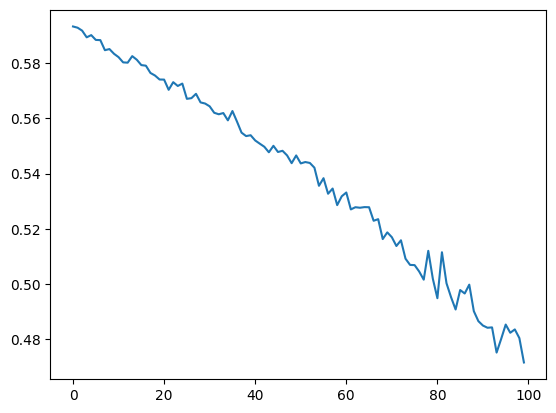

In [100]:
# visualise results

plt.plot(range(epochs), losses)
plt.ylabel=("error")
plt.xlabel=("Epoch")

In [101]:
# Evaluate model on test data set
with torch.no_grad(): # Turn off back propogation
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test) # find error
    print(loss)

tensor(0.4934)


In [102]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "healthy"
    elif y_test[i] == 1:
      x = "parkinsons"
    
     # Model prediction
    print(f"{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # If it is correct
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f"{correct} correct!")

1.)  tensor([-0.8165,  1.5129]) 	 1 	 1
2.)  tensor([-0.7907,  0.9471]) 	 1 	 1
3.)  tensor([-0.7950,  1.1448]) 	 1 	 1
4.)  tensor([-0.5484,  0.1932]) 	 1 	 1
5.)  tensor([-0.6094,  0.5885]) 	 0 	 1
6.)  tensor([-0.6559,  0.8925]) 	 1 	 1
7.)  tensor([-0.5586,  0.4078]) 	 0 	 1
8.)  tensor([-0.9290,  1.5547]) 	 1 	 1
9.)  tensor([-0.6349,  0.9305]) 	 1 	 1
10.)  tensor([-0.8903,  1.3949]) 	 1 	 1
11.)  tensor([-0.5580,  0.3838]) 	 1 	 1
12.)  tensor([-0.7668,  1.1779]) 	 1 	 1
13.)  tensor([-0.6016,  0.6829]) 	 1 	 1
14.)  tensor([-0.6647,  0.6484]) 	 1 	 1
15.)  tensor([-0.5645,  0.5510]) 	 1 	 1
16.)  tensor([-0.5592,  0.3061]) 	 0 	 1
17.)  tensor([-0.5564,  0.4787]) 	 1 	 1
18.)  tensor([-0.8919,  1.6386]) 	 1 	 1
19.)  tensor([-0.6461,  0.5909]) 	 1 	 1
20.)  tensor([-0.8957,  1.2313]) 	 1 	 1
21.)  tensor([-0.8493,  1.3769]) 	 1 	 1
22.)  tensor([-0.4717,  0.2440]) 	 0 	 1
23.)  tensor([-0.4690,  0.2493]) 	 0 	 1
24.)  tensor([-0.5078,  0.2646]) 	 1 	 1
25.)  tensor([-0.8589,  1

In [103]:
new_data = torch.tensor([201.464000, 0.001980, 0.011940, 0.001350, 0.344252, 0.057610])

In [104]:
# feed model new data and apply softmax function to derive probabilities
with torch.no_grad():
    pred_tensor = model(new_data) # raw data
    probabilities = F.softmax(pred_tensor, dim=0)  # Normalize to probabilities
    pred_index = torch.argmax(probabilities)

    # convert probs to array
    prob_array = probabilities.numpy()

    # access probabilities and convert to percentage
    prob_healthy = prob_array[0] * 100
    prob_parkinsons = prob_array[1] * 100
"""
    print(f"probability of being healthy: {prob_healthy}%")
    print(f"probability of parkinson diagnosis: {prob_parkinsons}%")
"""
if prob_healthy > prob_parkinsons:
    print("Patient is most likely healthy")
else:
    print("Patient is more likely to be diagnosed with parkinson")


Patient is most likely healthy
